# Train data visualization

Reference: https://www.kaggle.com/oysteijo/just-some-simple-train-data-investigation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output
from PIL import Image

%matplotlib inline


Investigate the data size and data distribution.

Text(0.5,0,'species of a seedling')

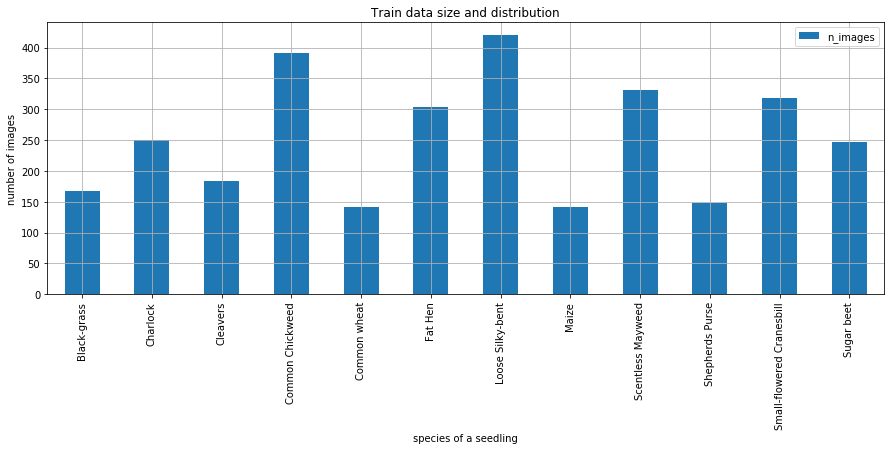

In [2]:
dir_list = []

classes = check_output(["ls", "../data/train"]).decode("utf8").strip().split("\n")

for c in classes:
    files = check_output(["ls", "../data/train/%s" % c]).decode("utf8").strip().split("\n")
    dir_list.append(files)
    files = check_output(["ls", "-l", "../data/train/%s" % c]).decode("utf8").strip().split("\n")  
    
df = pd.DataFrame({"n_images": [len(x) for x in dir_list]}, index=classes)

dataDistri = df.plot(kind="bar", figsize=(15,5),title = 'Train data size and distribution',grid = True)
dataDistri.set_ylabel('number of images')
dataDistri.set_xlabel('species of a seedling')

In [3]:
plt.show()

Investigate the relation between species and image dimension.

In [4]:
images = []
im_class = []
im_height = []
im_width = []
for c, files in zip(classes, dir_list):
    for img in files:
        im = Image.open("../data/train/%s/%s" % (c, img))
        images.append(img)
        im_class.append(c)
        im_height.append(im.height)
        im_width.append(im.width)

df_all = pd.DataFrame({"class": im_class, "height": im_height, "width": im_width}, index=images)
        

In [5]:
df_all.sample(20)

,class,height,width
dd76f845f.png,Common Chickweed,65,65
f2b027c00.png,Loose Silky-bent,116,116
f605d4fb8.png,Fat Hen,133,133
15ff4b029.png,Common Chickweed,208,208
6cead585f.png,Cleavers,157,157
6fe86aa3b.png,Shepherds Purse,168,168
f36b25868.png,Fat Hen,304,304
56f69db16.png,Common Chickweed,90,90
a8d82b05a.png,Scentless Mayweed,79,79
c4a974463.png,Cleavers,395,395


[Text(0,0.5,'distribution'), Text(0.5,1,'Image size distribution')]

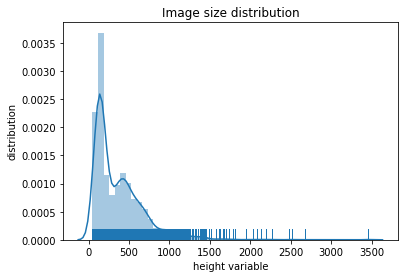

In [6]:
import seaborn as sns
fig = sns.distplot(df_all.height, rug=True, axlabel="height variable")
fig.set(ylabel = 'distribution', title = 'Image size distribution')

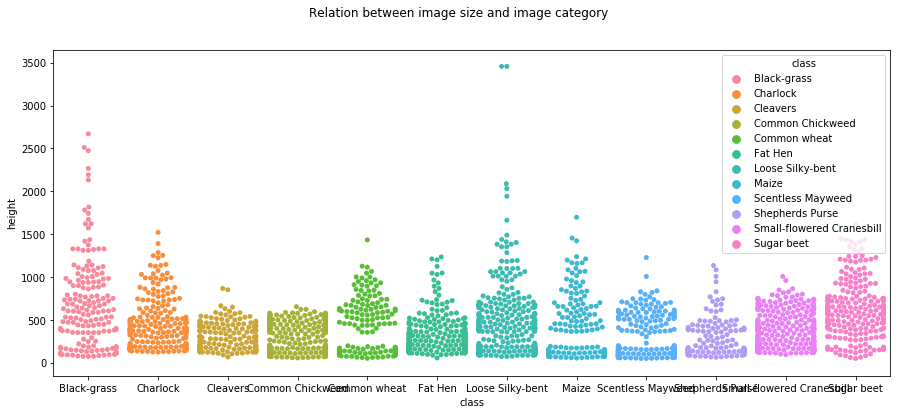

In [36]:
# Draw a categorical scatterplot to show each observation
fig, ax = plt.subplots(figsize=(15,6))
sns.swarmplot(y="height",x = "class", hue="class", data=df_all, ax=ax)
fig.suptitle('Relation between image size and image category')

In [7]:
a_ratio = df_all.height.astype("float") / df_all.width.astype("float")
df_all["a_ratio"] = a_ratio

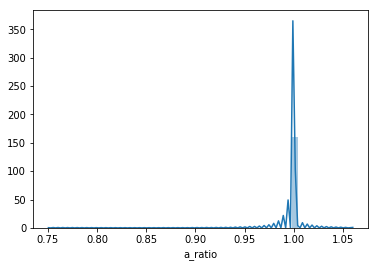

In [8]:
sns.distplot(df_all.a_ratio)
